In [104]:
import os
os.getcwd()
os.chdir("C:\\Users\\nathi\\Downloads\\3 Semester\\AMS\\")

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.signal import peak_prominences
import numpy as np

path = 'datasets_pseudo/Threshold/'
names = os.listdir(path)
dfs = {}

for name in names:
    machine, material, component, _ = name.replace('.csv', '').split('_')
    tempdf = pd.read_csv(f"{path}\\{name}") 
    # tempdf[['Machine', 'Material', 'Component']] = [machine, material, component]
    print(f"Size of {name}: {tempdf.shape}")

    dfs[name.replace('.csv', '')] = tempdf

df = pd.concat(dfs.values(), ignore_index=True)
display(df.head(5))

Size of threshold_CMX1_AL_CP1.csv: (433666, 64)
Size of threshold_CMX1_AL_CP2.csv: (74822, 64)
Size of threshold_CMX1_S_CP1.csv: (244772, 64)
Size of threshold_CMX1_S_CP2.csv: (45468, 64)
Size of threshold_DMC2_AL_CP1.csv: (510050, 64)
Size of threshold_DMC2_AL_CP2.csv: (64337, 64)
Size of threshold_DMC2_S_CP1.csv: (263913, 64)
Size of threshold_DMC2_S_CP2.csv: (42016, 64)


,Unnamed: 0,LOAD|1,LOAD|2,LOAD|3,LOAD|6,ENC_POS|1,ENC_POS|2,ENC_POS|3,ENC_POS|6,CTRL_DIFF2|1,...,CURRENT|2,CURRENT|3,CURRENT|6,Machine,Material,Component,CURRENT|1_Peak,CURRENT|2_Peak,CURRENT|3_Peak,CURRENT|6_Peak
0,120290,3.857422,3.320312,24.230957,3.619385,-335.15767,-234.31094,-401.311863,527761.371165,0.013478,...,-0.599854,4.352783,-1.017822,CMX1,AL,CP1,False,False,False,False
1,120291,3.857422,3.320312,24.230957,3.619385,-335.15213,-234.31158,-401.311453,527783.573847,0.013601,...,-0.640869,4.371582,-1.015137,CMX1,AL,CP1,False,False,False,False
2,120292,4.199219,3.985596,24.212646,3.607178,-335.14666,-234.31181,-401.311073,527805.777216,0.013794,...,-0.702393,4.357910,-1.015137,CMX1,AL,CP1,False,False,False,False
3,120293,4.199219,3.985596,24.212646,3.607178,-335.14170,-234.31153,-401.311273,527827.979212,0.014498,...,-0.712646,4.349365,-1.012451,CMX1,AL,CP1,False,False,False,False
4,120294,4.907227,4.229736,24.291992,3.601074,-335.13690,-234.31128,-401.311323,527850.179835,0.015361,...,-0.753662,4.371582,-1.009766,CMX1,AL,CP1,False,False,False,False


In [106]:

# Choose column to detect peaks on
columns_to_predict = ['CURRENT|1', 'CURRENT|2', 'CURRENT|3', 'CURRENT|6']

# Moving average window size
window_sizes = [100,500, 750, 1000, 1250, 1500, 2000]
threshold_high, threshold_med, threshold_low = 2.5, 1.5, 1.2

os.makedirs("Results/", exist_ok=True)


C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


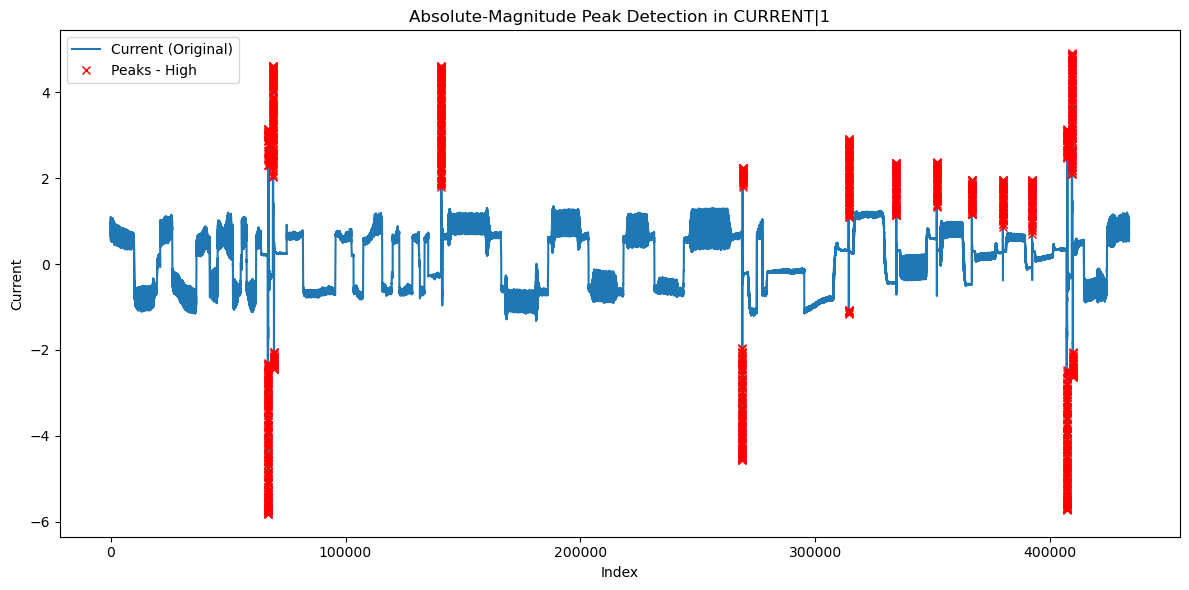

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


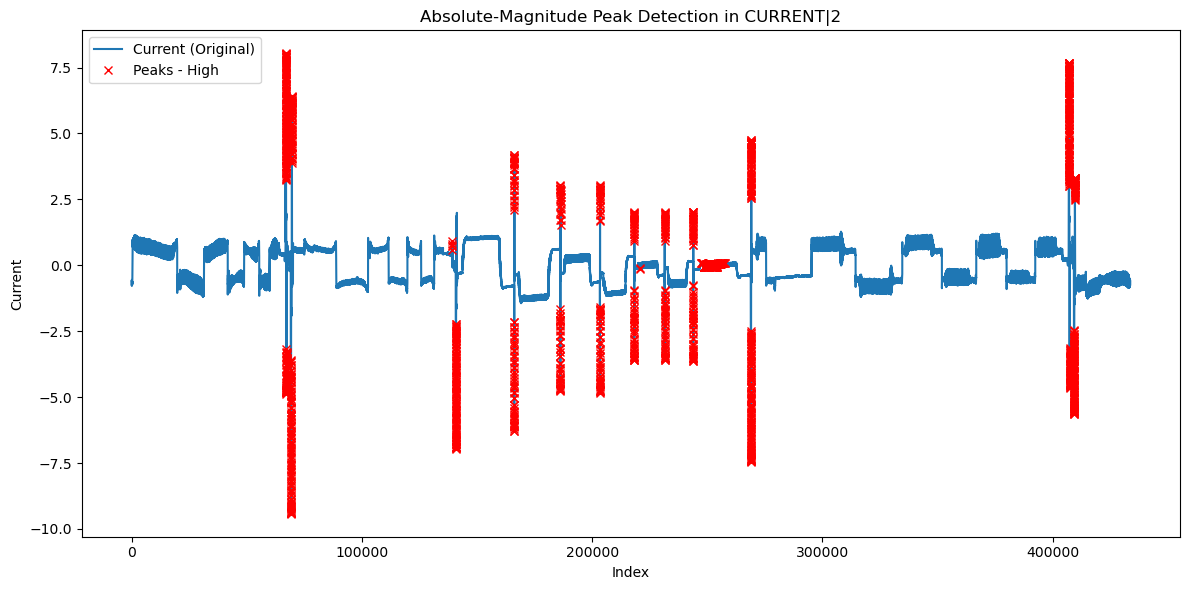

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


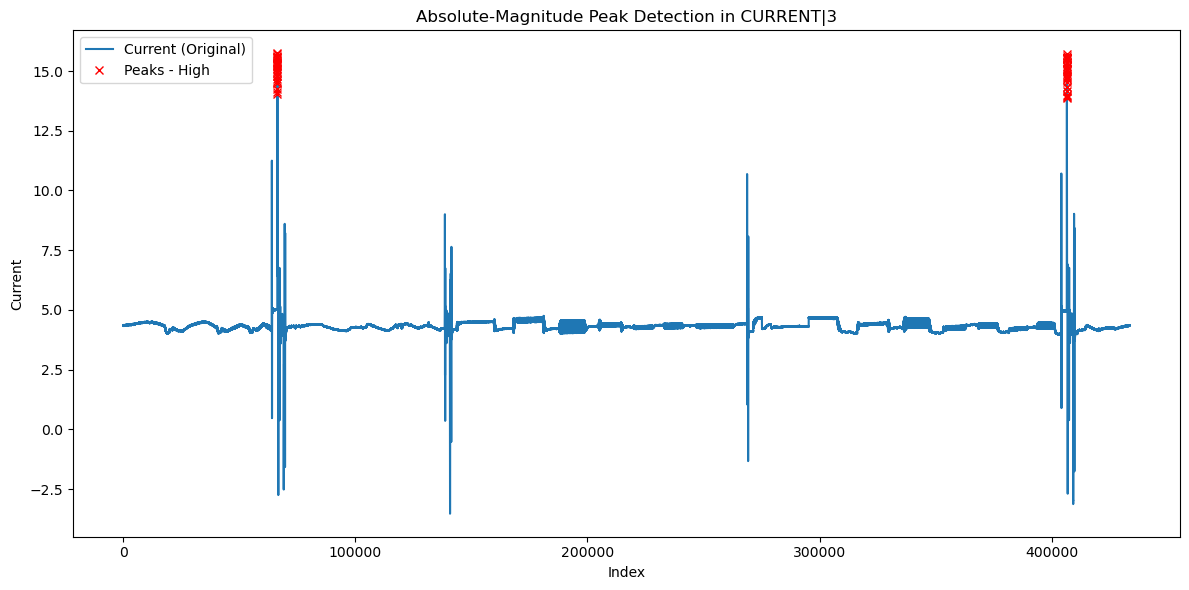

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


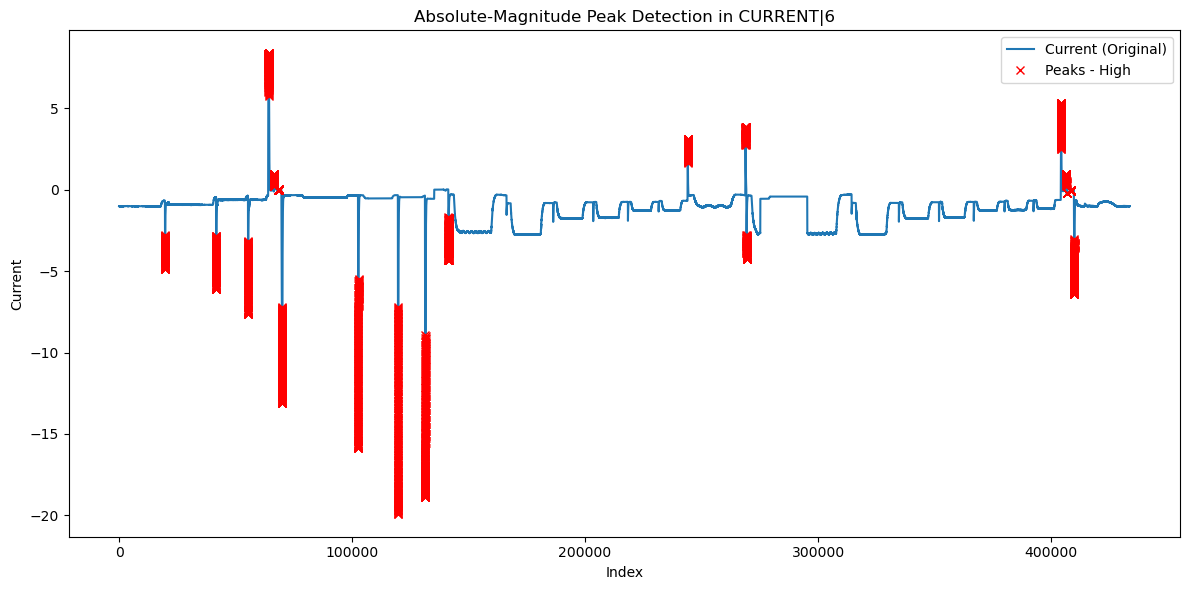

,Dataset,Column,Window,Accuracy,Precision,Recall,F1,Detected_Peaks,Prominence
3,threshold_CMX1_AL_CP1,CURRENT|6,1500,0.986231,0.927470,0.314707,0.469951,2854,0.000000
1,threshold_CMX1_AL_CP1,CURRENT|2,1500,0.982000,0.669061,0.164121,0.263585,2088,0.000000
0,threshold_CMX1_AL_CP1,CURRENT|1,1500,0.982745,0.952719,0.140060,0.244218,1269,0.000000
2,threshold_CMX1_AL_CP1,CURRENT|3,1500,0.980280,1.000000,0.006736,0.013383,58,0.000003


C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


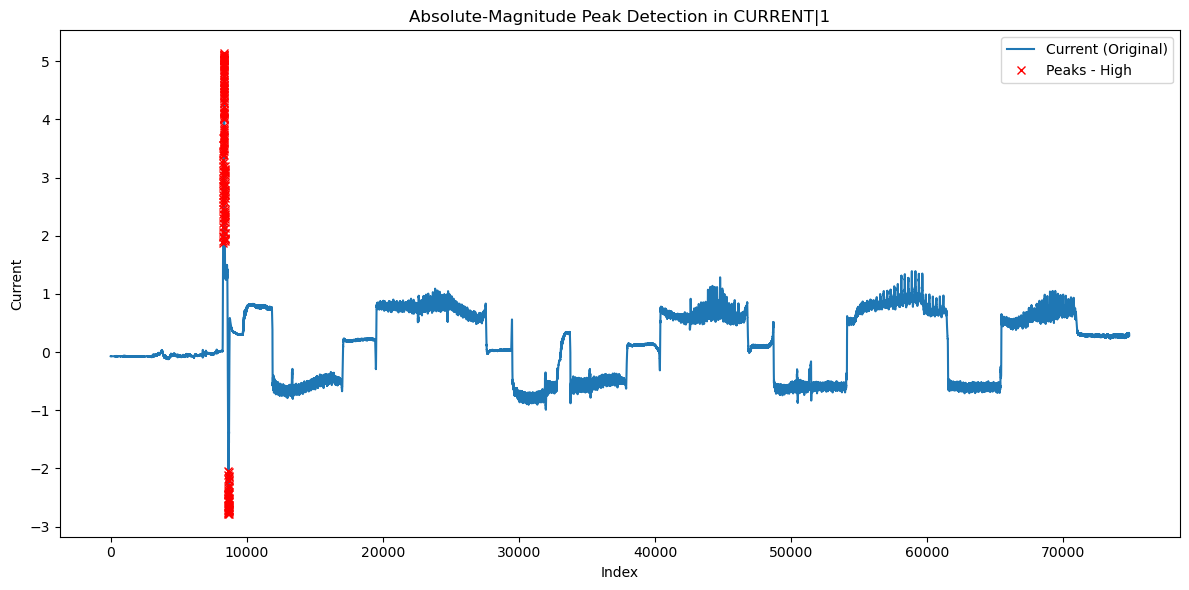

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


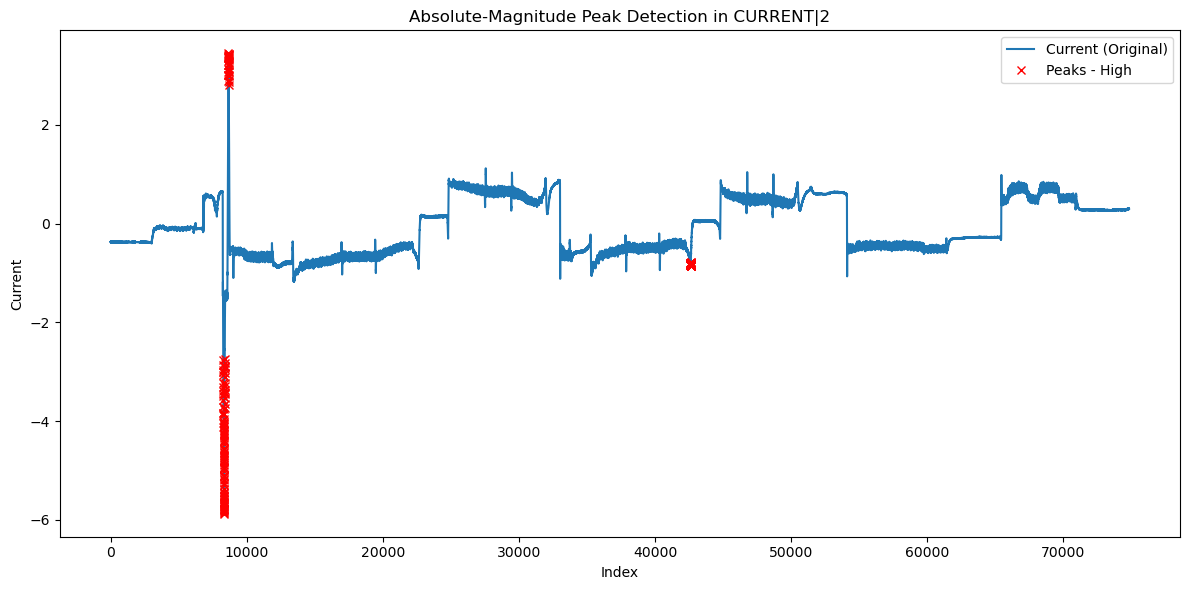

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


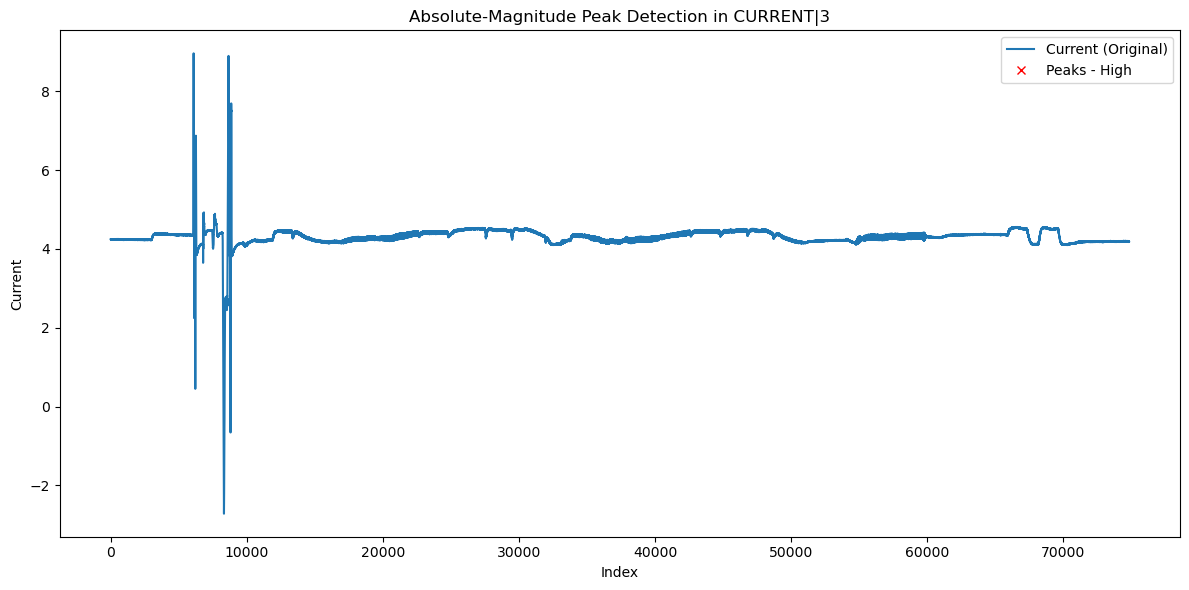

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


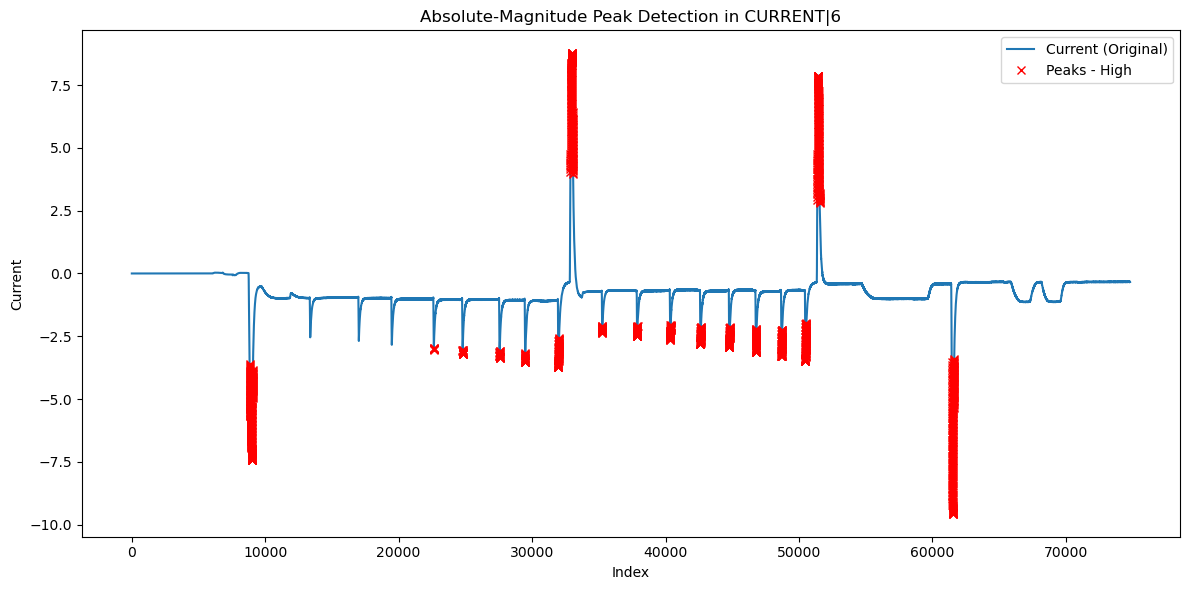

,Dataset,Column,Window,Accuracy,Precision,Recall,F1,Detected_Peaks,Prominence
7,threshold_CMX1_AL_CP2,CURRENT|6,1500,0.988613,0.727915,0.688043,0.707418,1415,0.000000
3,threshold_CMX1_AL_CP1,CURRENT|6,1500,0.986231,0.927470,0.314707,0.469951,2854,0.000000
1,threshold_CMX1_AL_CP1,CURRENT|2,1500,0.982000,0.669061,0.164121,0.263585,2088,0.000000
0,threshold_CMX1_AL_CP1,CURRENT|1,1500,0.982745,0.952719,0.140060,0.244218,1269,0.000000
4,threshold_CMX1_AL_CP2,CURRENT|1,1500,0.982385,1.000000,0.117214,0.209832,175,0.000000
5,threshold_CMX1_AL_CP2,CURRENT|2,1500,0.981877,0.777174,0.098080,0.174178,184,0.000000
2,threshold_CMX1_AL_CP1,CURRENT|3,1500,0.980280,1.000000,0.006736,0.013383,58,0.000003
6,threshold_CMX1_AL_CP2,CURRENT|3,1500,0.980140,0.000000,0.000000,0.000000,0,0.000000


C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


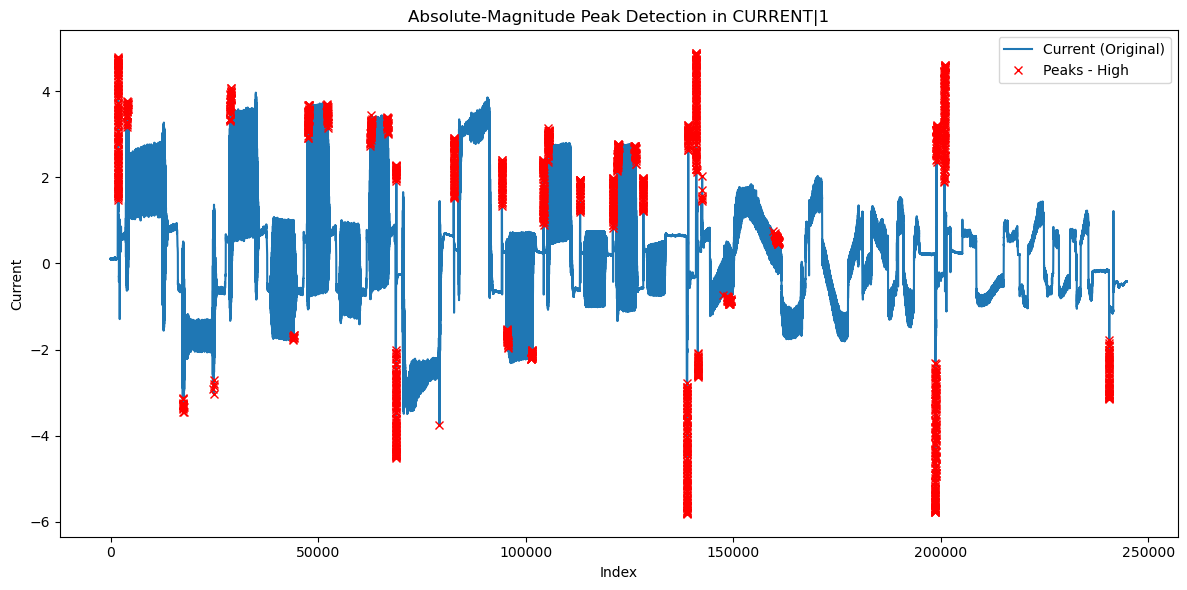

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


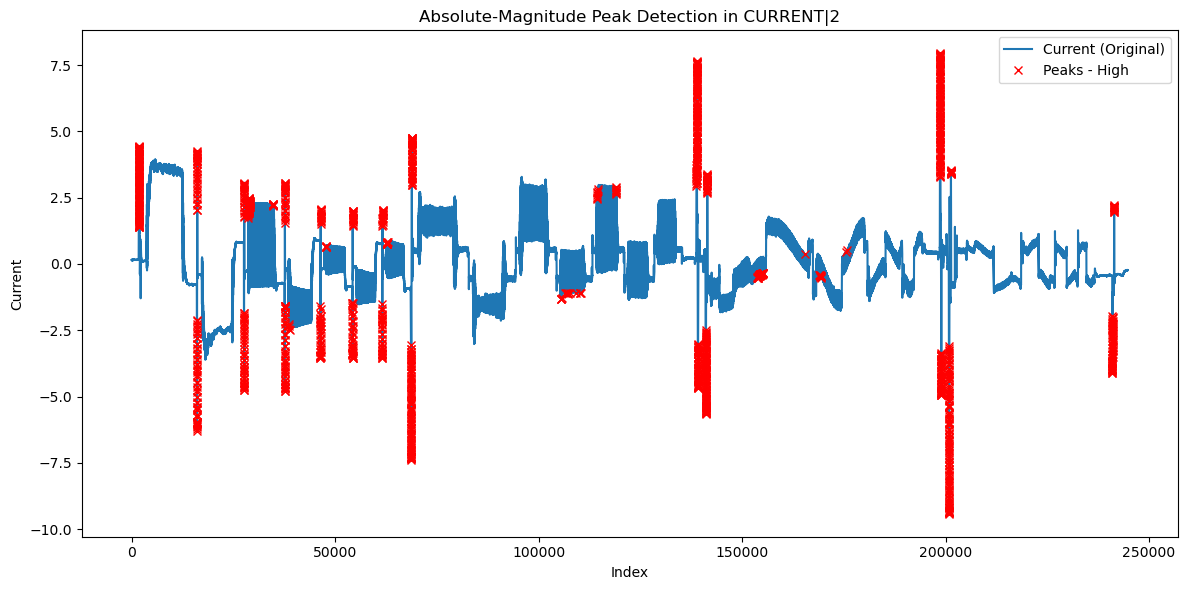

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


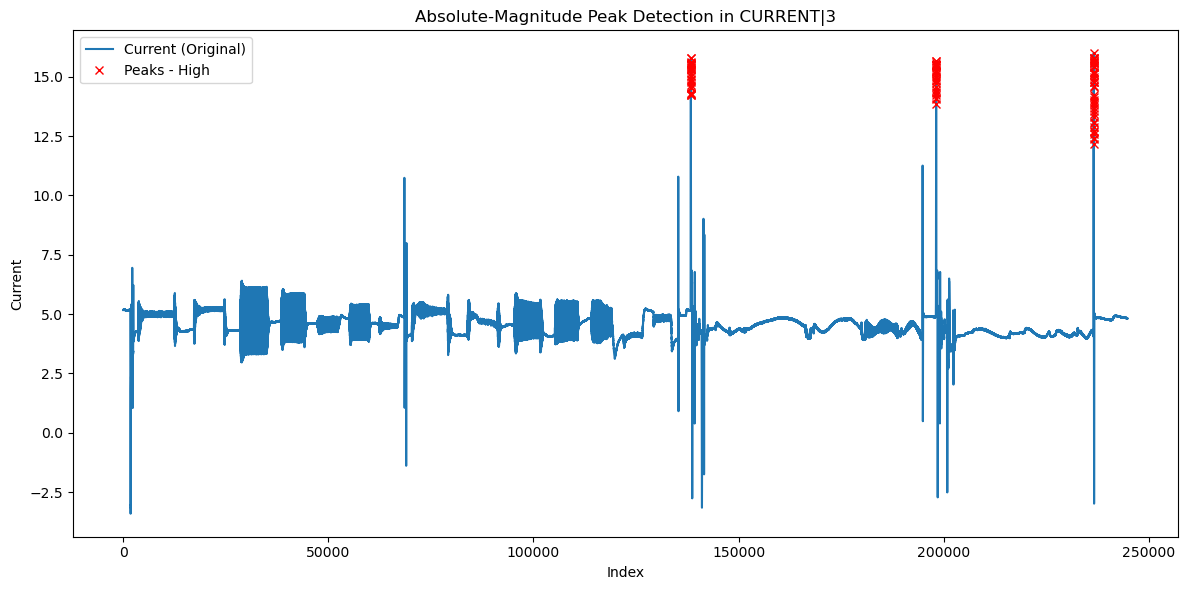

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


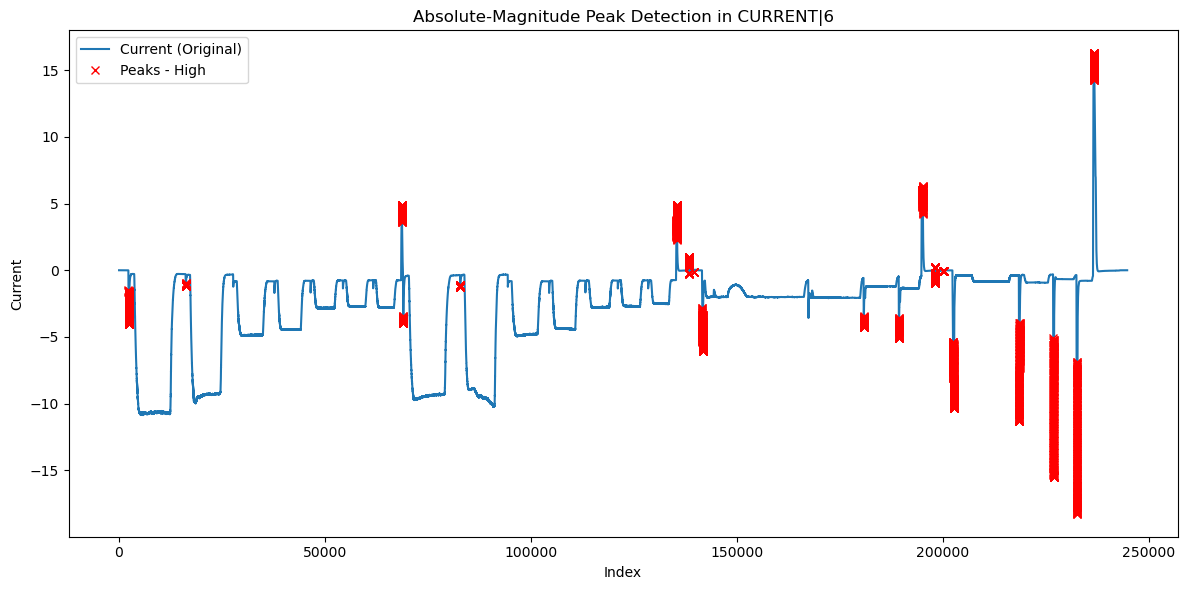

,Dataset,Column,Window,Accuracy,Precision,Recall,F1,Detected_Peaks,Prominence
7,threshold_CMX1_AL_CP2,CURRENT|6,1500,0.988613,0.727915,0.688043,0.707418,1415,0.000000
3,threshold_CMX1_AL_CP1,CURRENT|6,1500,0.986231,0.927470,0.314707,0.469951,2854,0.000000
11,threshold_CMX1_S_CP1,CURRENT|6,1500,0.978882,0.440948,0.233299,0.305149,2574,0.000000
9,threshold_CMX1_S_CP1,CURRENT|2,1500,0.981346,0.598874,0.196026,0.295370,1598,0.000000
1,threshold_CMX1_AL_CP1,CURRENT|2,1500,0.982000,0.669061,0.164121,0.263585,2088,0.000000
0,threshold_CMX1_AL_CP1,CURRENT|1,1500,0.982745,0.952719,0.140060,0.244218,1269,0.000000
4,threshold_CMX1_AL_CP2,CURRENT|1,1500,0.982385,1.000000,0.117214,0.209832,175,0.000000
8,threshold_CMX1_S_CP1,CURRENT|1,1500,0.977886,0.355878,0.135972,0.196765,1863,0.000000
5,threshold_CMX1_AL_CP2,CURRENT|2,1500,0.981877,0.777174,0.098080,0.174178,184,0.000000
10,threshold_CMX1_S_CP1,CURRENT|3,1500,0.980488,1.000000,0.020709,0.040579,101,0.000000


C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


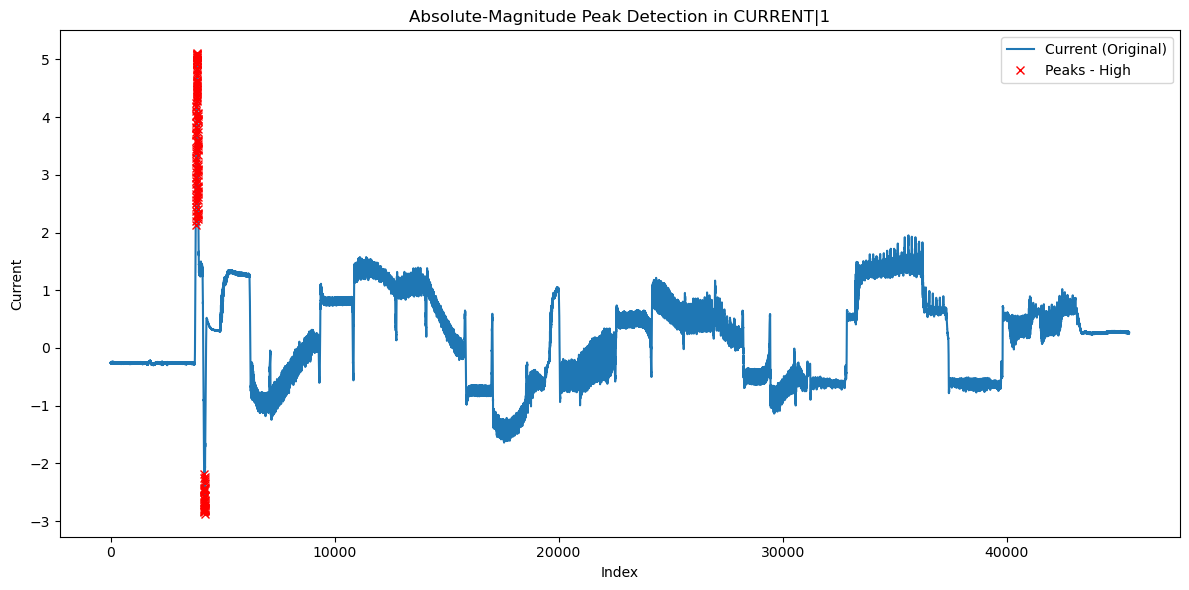

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


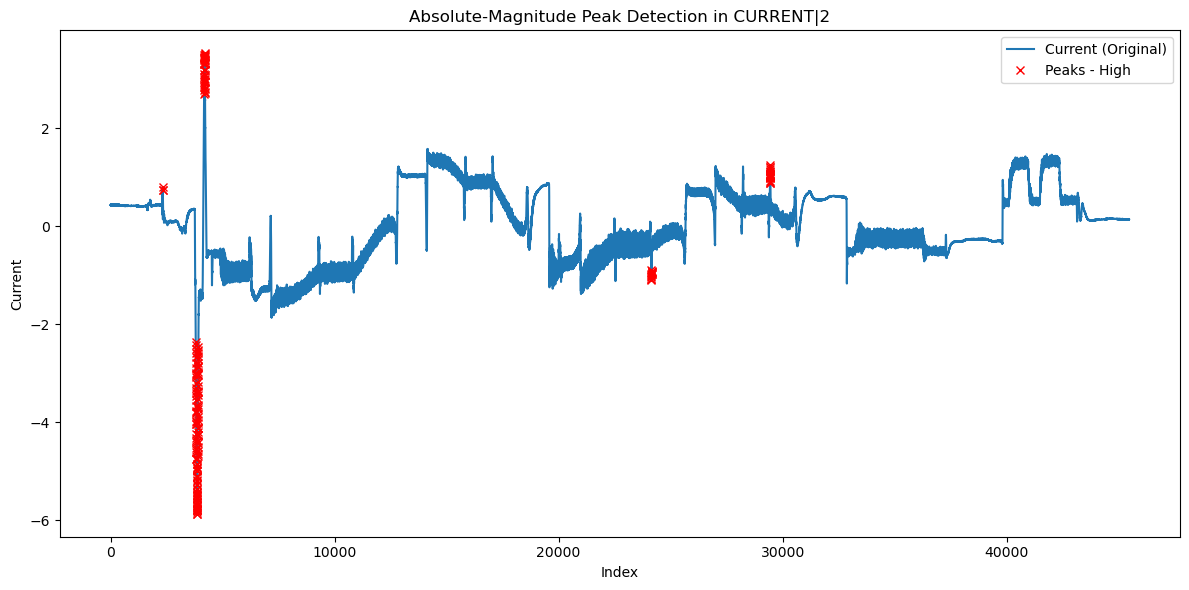

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


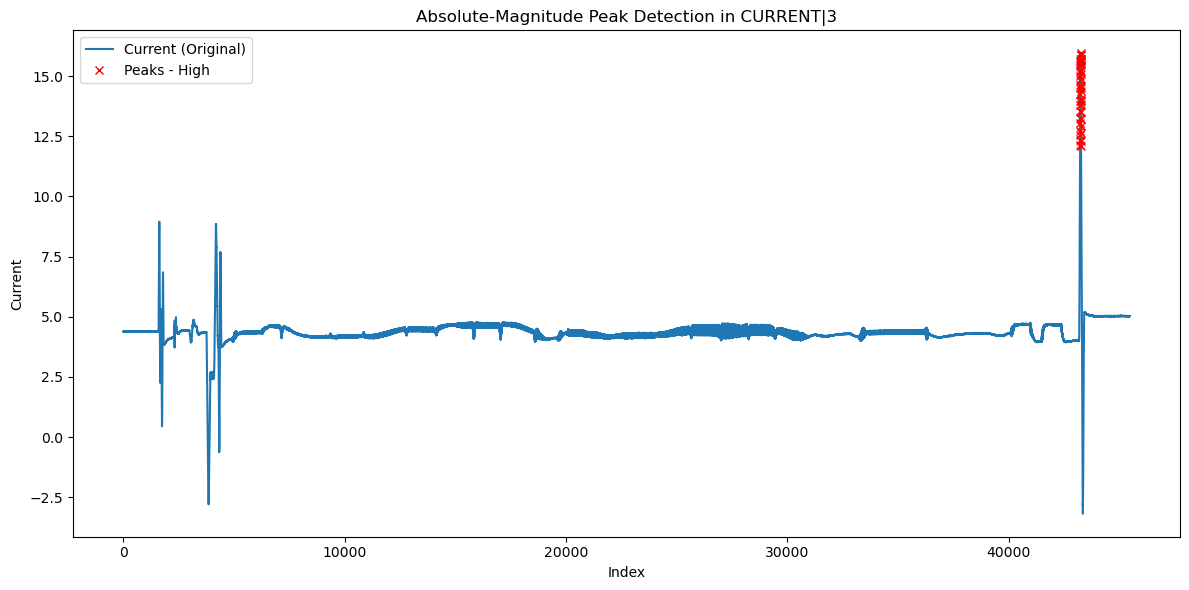

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


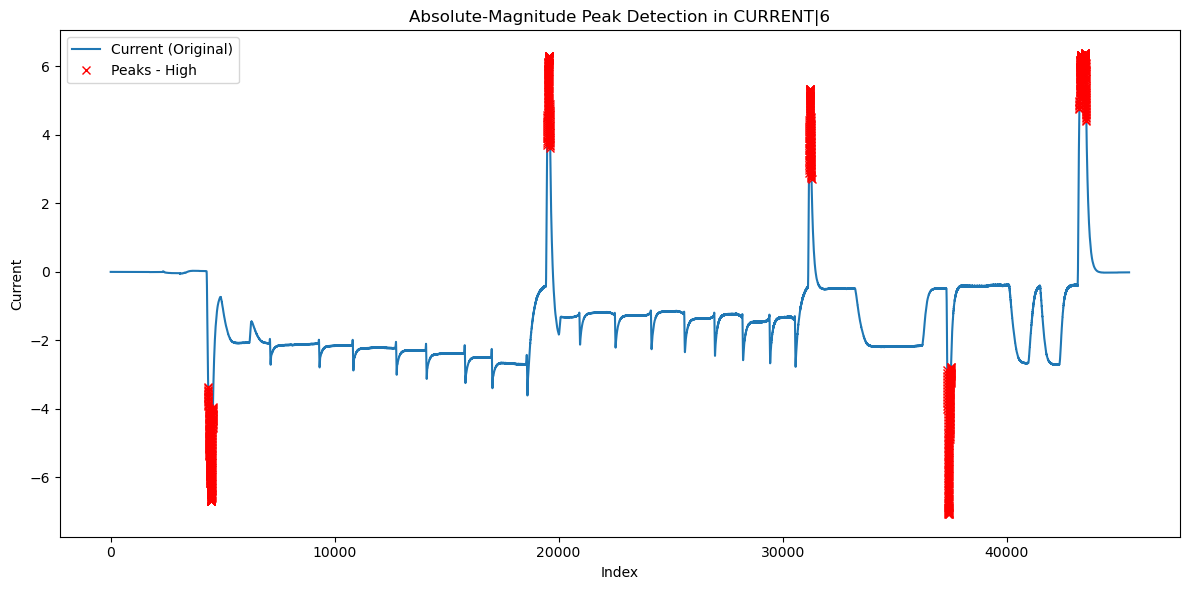

,Dataset,Column,Window,Accuracy,Precision,Recall,F1,Detected_Peaks,Prominence
15,threshold_CMX1_S_CP2,CURRENT|6,1500,0.995007,0.864461,0.890110,0.877098,937,0.000000
7,threshold_CMX1_AL_CP2,CURRENT|6,1500,0.988613,0.727915,0.688043,0.707418,1415,0.000000
3,threshold_CMX1_AL_CP1,CURRENT|6,1500,0.986231,0.927470,0.314707,0.469951,2854,0.000000
11,threshold_CMX1_S_CP1,CURRENT|6,1500,0.978882,0.440948,0.233299,0.305149,2574,0.000000
12,threshold_CMX1_S_CP2,CURRENT|1,1500,0.983615,1.000000,0.176796,0.300469,160,0.000000
9,threshold_CMX1_S_CP1,CURRENT|2,1500,0.981346,0.598874,0.196026,0.295370,1598,0.000000
13,threshold_CMX1_S_CP2,CURRENT|2,1500,0.982823,0.795000,0.176863,0.289354,200,0.000030
1,threshold_CMX1_AL_CP1,CURRENT|2,1500,0.982000,0.669061,0.164121,0.263585,2088,0.000000
0,threshold_CMX1_AL_CP1,CURRENT|1,1500,0.982745,0.952719,0.140060,0.244218,1269,0.000000
4,threshold_CMX1_AL_CP2,CURRENT|1,1500,0.982385,1.000000,0.117214,0.209832,175,0.000000


C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


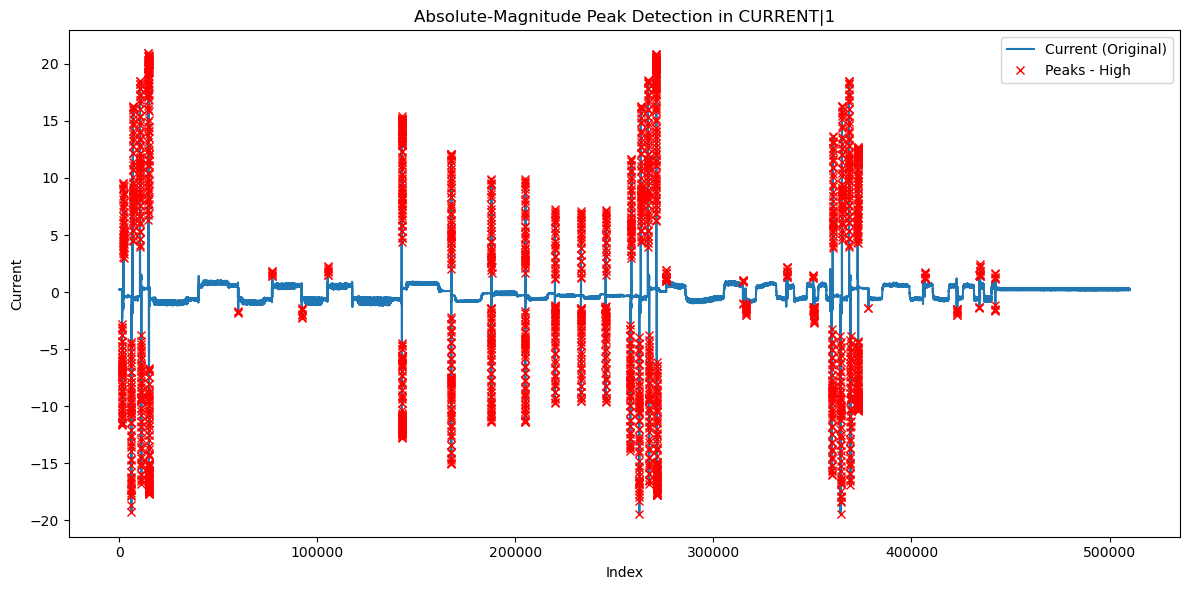

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


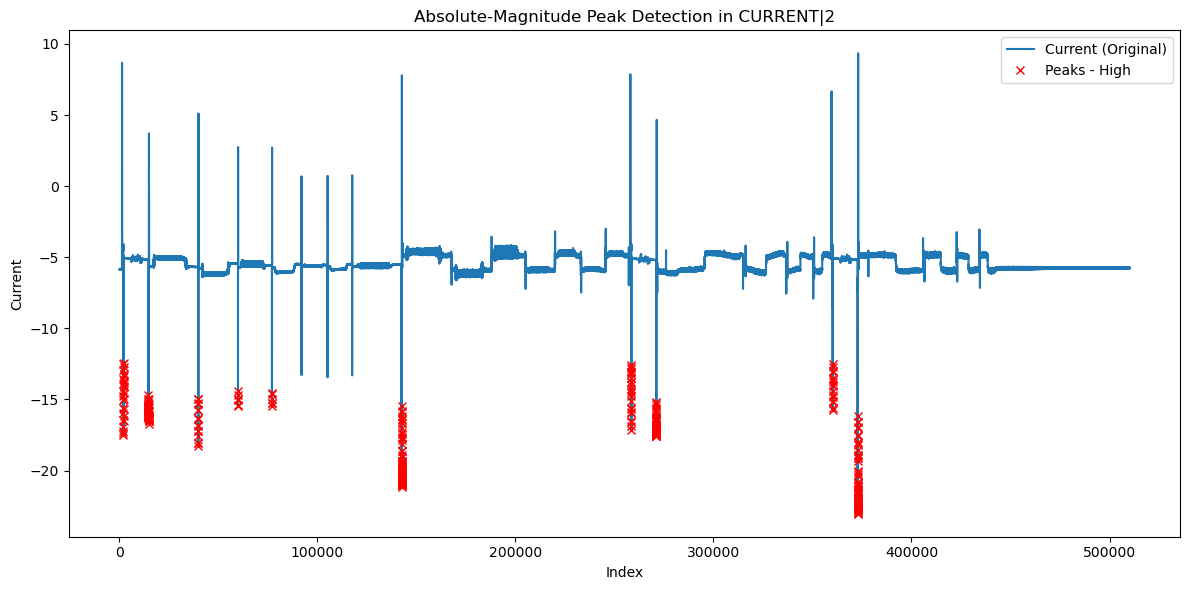

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


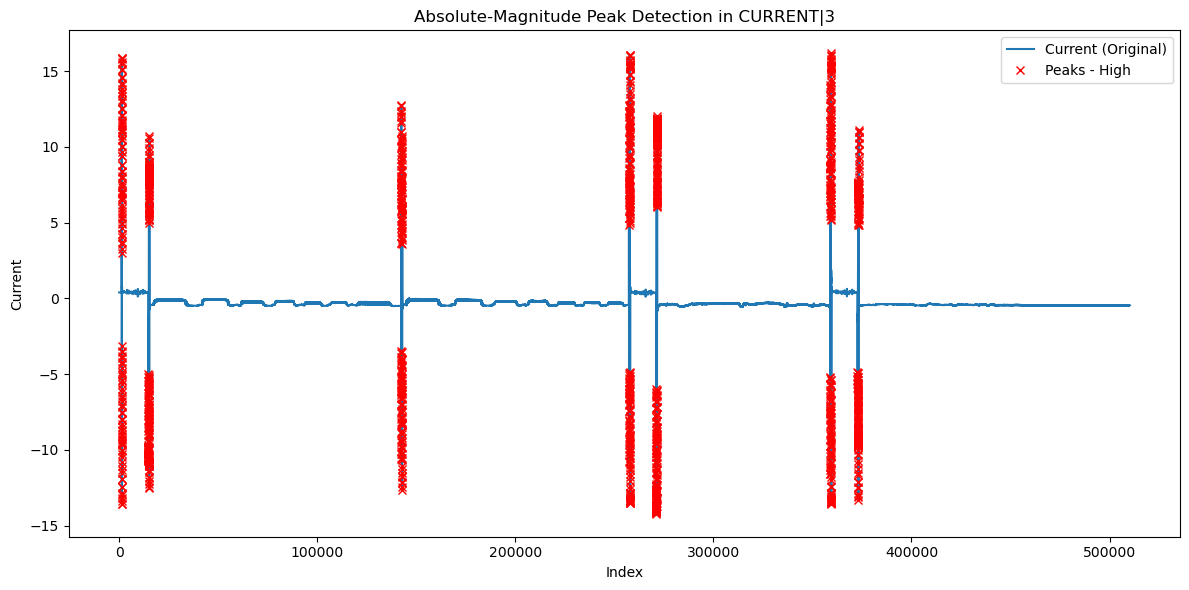

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


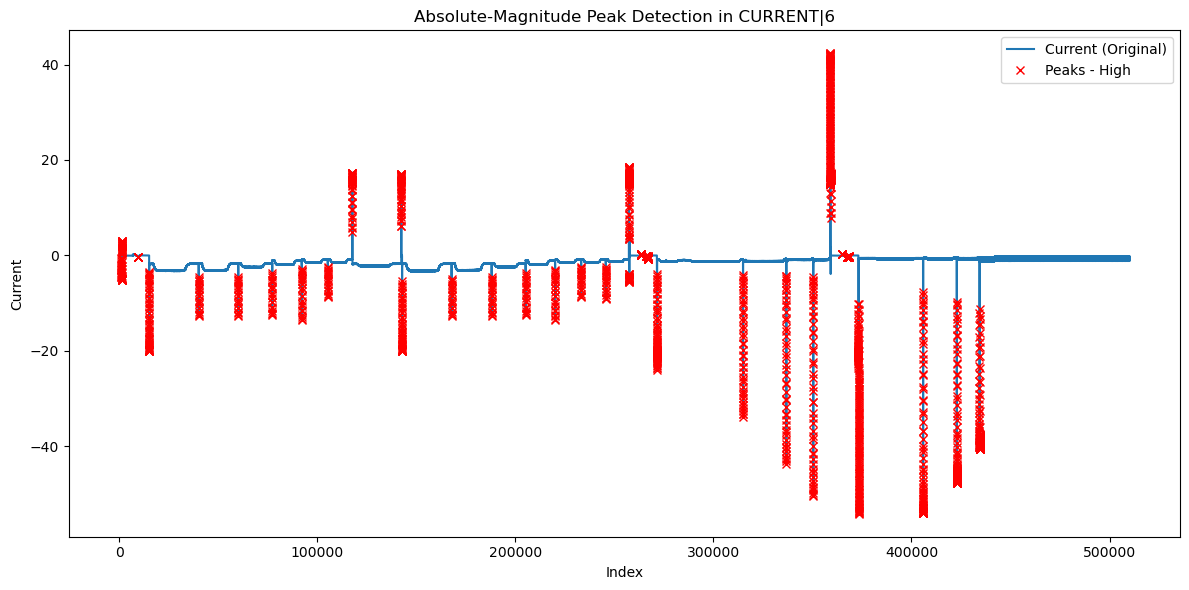

,Dataset,Column,Window,Accuracy,Precision,Recall,F1,Detected_Peaks,Prominence
15,threshold_CMX1_S_CP2,CURRENT|6,1500,0.995007,0.864461,0.890110,0.877098,937,0.000000
18,threshold_DMC2_AL_CP1,CURRENT|3,1500,0.999200,0.714486,1.000000,0.833469,1429,0.000000
7,threshold_CMX1_AL_CP2,CURRENT|6,1500,0.988613,0.727915,0.688043,0.707418,1415,0.000000
16,threshold_DMC2_AL_CP1,CURRENT|1,1500,0.997351,0.430198,1.000000,0.601592,2371,0.000000
19,threshold_DMC2_AL_CP1,CURRENT|6,1500,0.997310,0.417371,0.871569,0.564444,2130,0.000000
17,threshold_DMC2_AL_CP1,CURRENT|2,1500,0.998708,1.000000,0.354554,0.523500,362,0.000000
3,threshold_CMX1_AL_CP1,CURRENT|6,1500,0.986231,0.927470,0.314707,0.469951,2854,0.000000
11,threshold_CMX1_S_CP1,CURRENT|6,1500,0.978882,0.440948,0.233299,0.305149,2574,0.000000
12,threshold_CMX1_S_CP2,CURRENT|1,1500,0.983615,1.000000,0.176796,0.300469,160,0.000000
9,threshold_CMX1_S_CP1,CURRENT|2,1500,0.981346,0.598874,0.196026,0.295370,1598,0.000000


C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


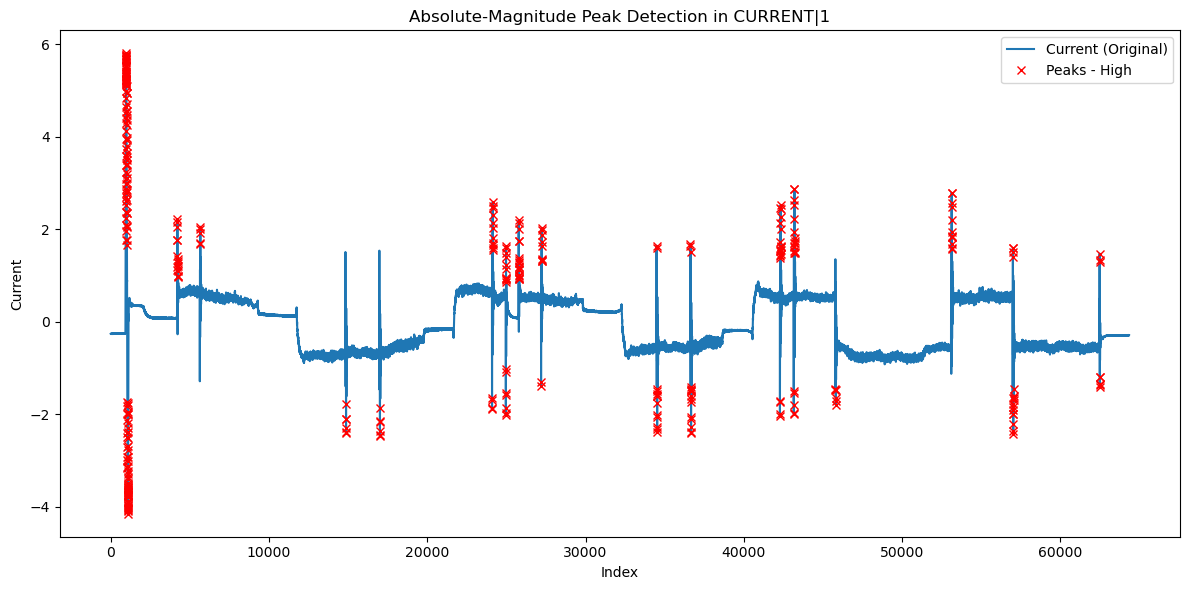

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


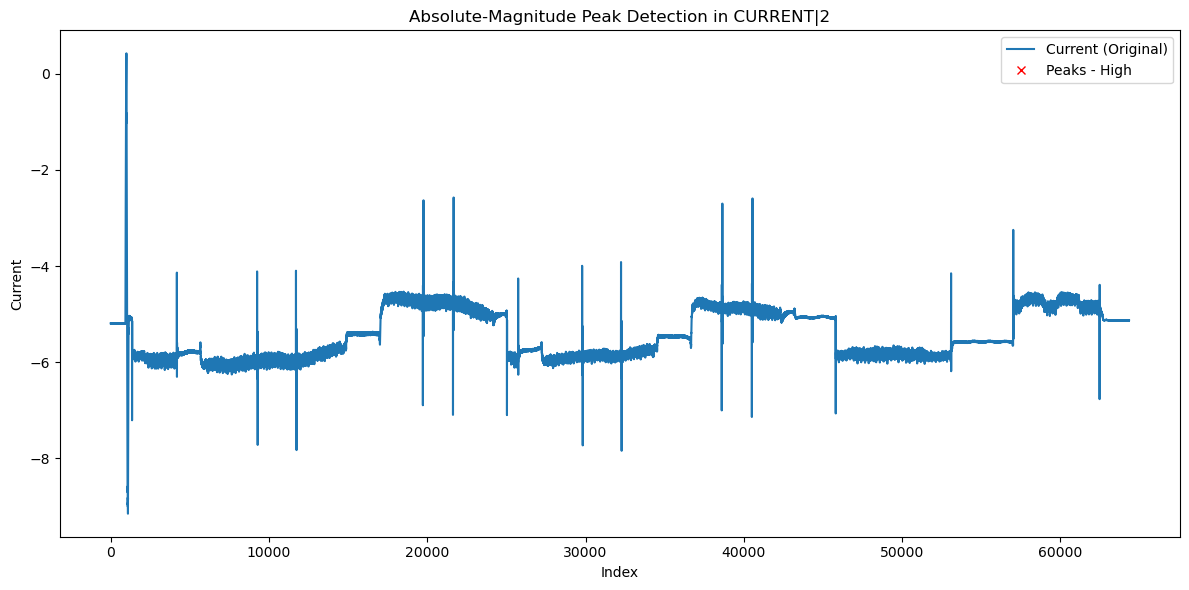

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


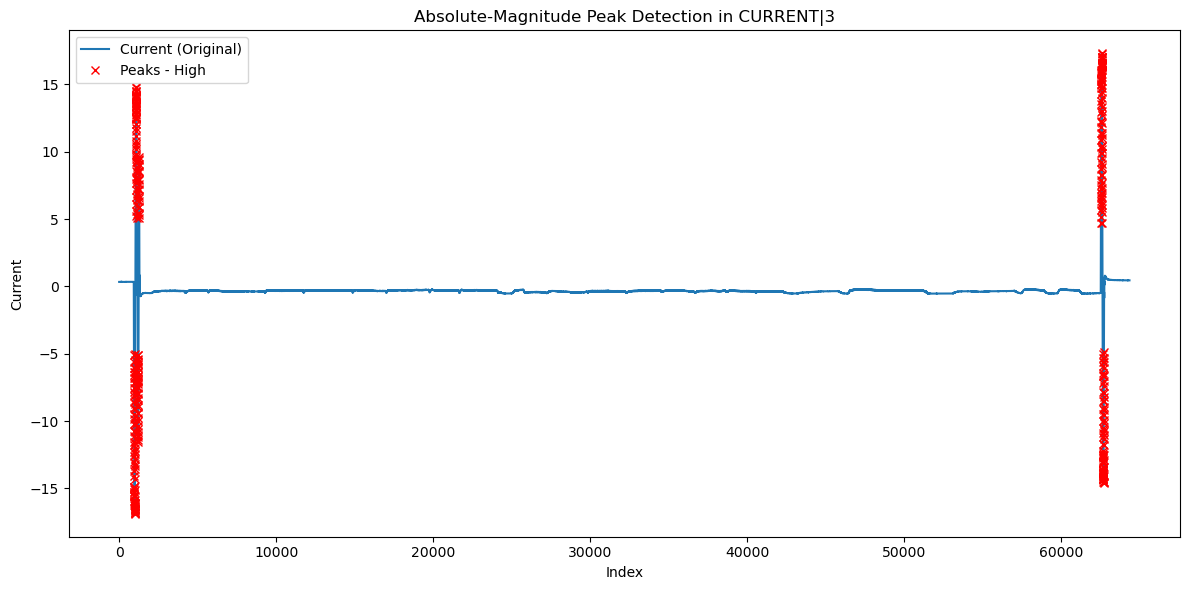

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


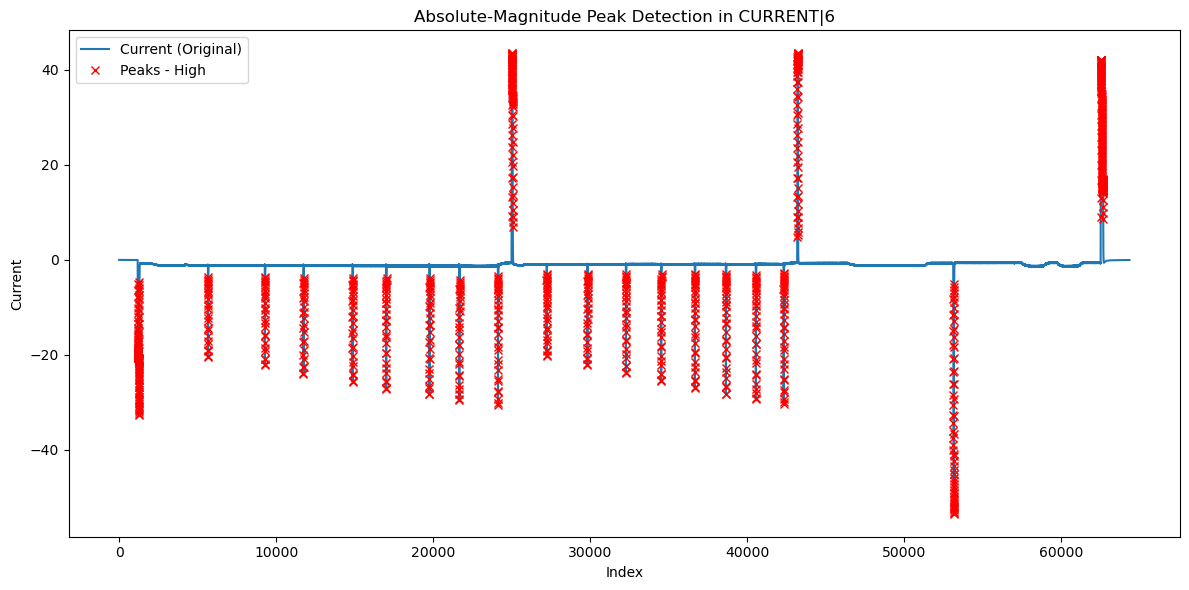

,Dataset,Column,Window,Accuracy,Precision,Recall,F1,Detected_Peaks,Prominence
23,threshold_DMC2_AL_CP2,CURRENT|6,1500,0.998632,0.983122,0.928287,0.954918,948,0.000000
15,threshold_CMX1_S_CP2,CURRENT|6,1500,0.995007,0.864461,0.890110,0.877098,937,0.000000
18,threshold_DMC2_AL_CP1,CURRENT|3,1500,0.999200,0.714486,1.000000,0.833469,1429,0.000000
7,threshold_CMX1_AL_CP2,CURRENT|6,1500,0.988613,0.727915,0.688043,0.707418,1415,0.000000
16,threshold_DMC2_AL_CP1,CURRENT|1,1500,0.997351,0.430198,1.000000,0.601592,2371,0.000000
19,threshold_DMC2_AL_CP1,CURRENT|6,1500,0.997310,0.417371,0.871569,0.564444,2130,0.000000
17,threshold_DMC2_AL_CP1,CURRENT|2,1500,0.998708,1.000000,0.354554,0.523500,362,0.000000
22,threshold_DMC2_AL_CP2,CURRENT|3,1500,0.989027,1.000000,0.353480,0.522327,386,0.000000
3,threshold_CMX1_AL_CP1,CURRENT|6,1500,0.986231,0.927470,0.314707,0.469951,2854,0.000000
20,threshold_DMC2_AL_CP2,CURRENT|1,1500,0.986104,1.000000,0.286512,0.445409,359,0.000000


C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


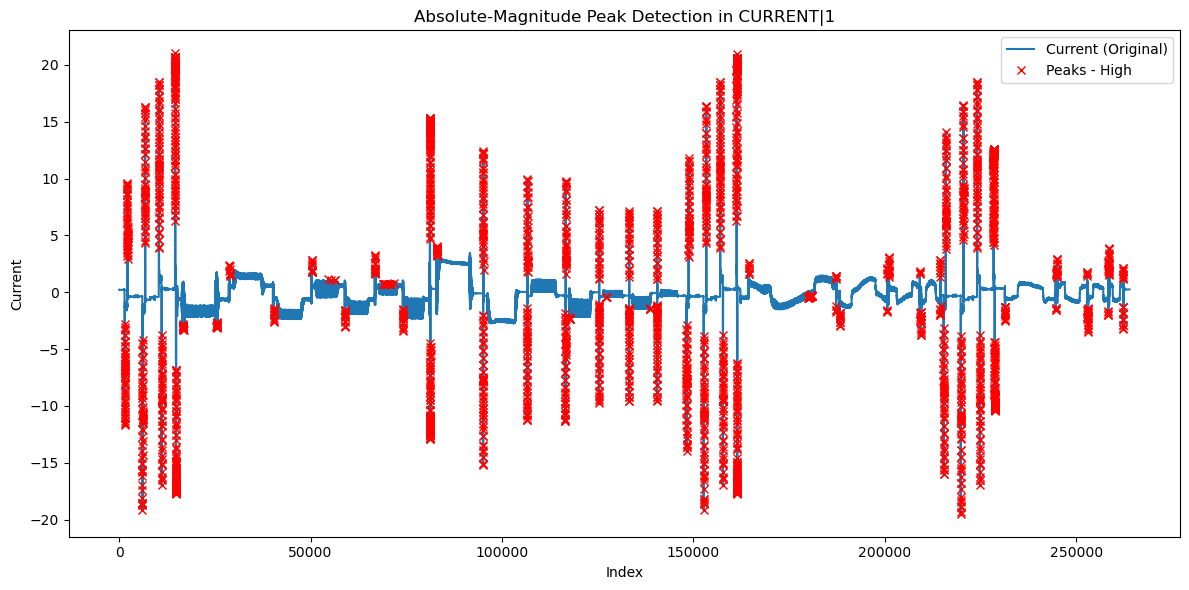

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


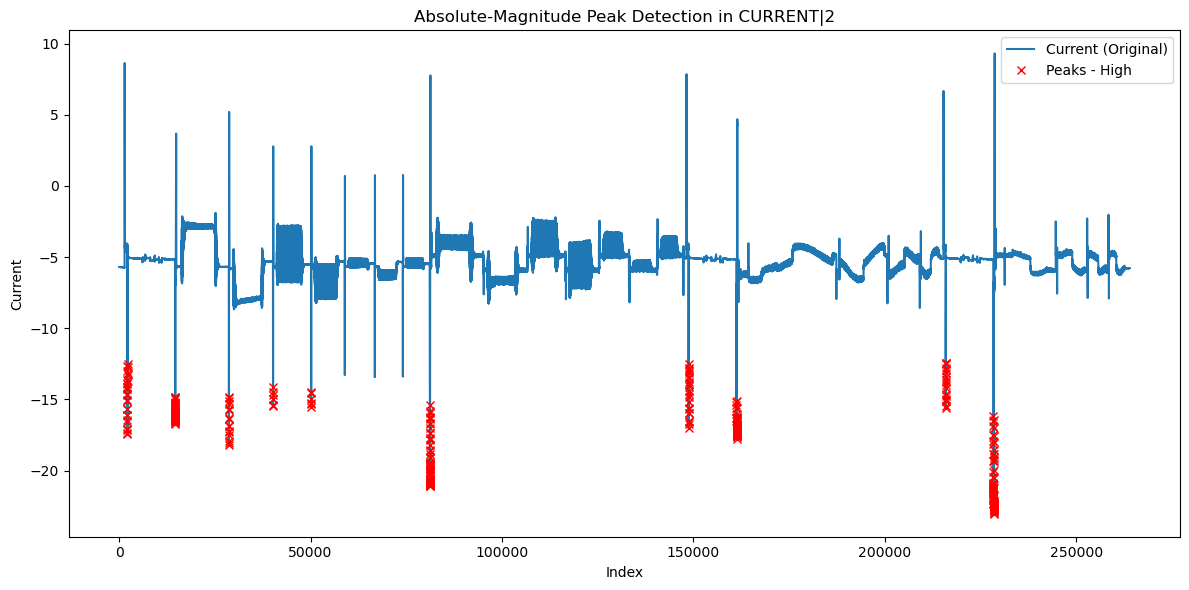

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


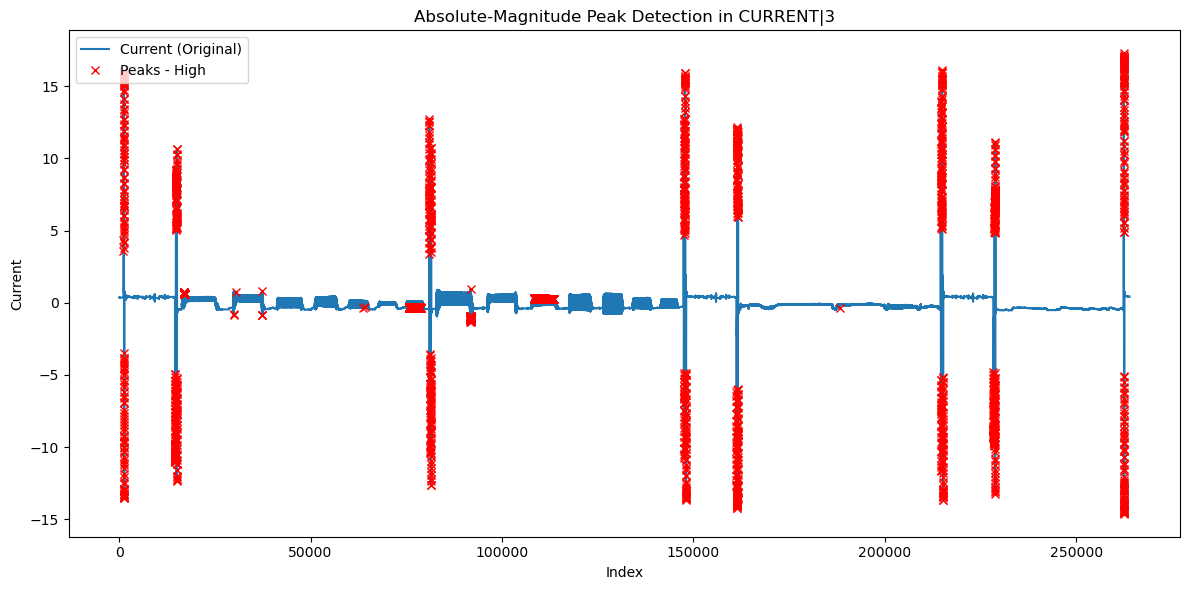

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


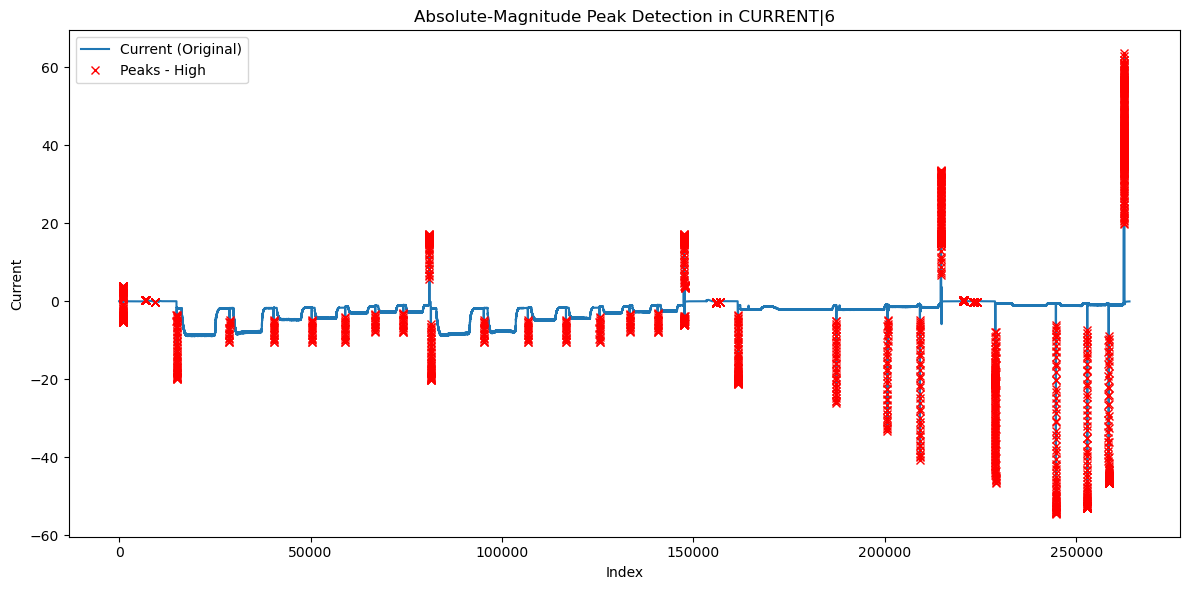

,Dataset,Column,Window,Accuracy,Precision,Recall,F1,Detected_Peaks,Prominence
23,threshold_DMC2_AL_CP2,CURRENT|6,1500,0.998632,0.983122,0.928287,0.954918,948,0.000000
15,threshold_CMX1_S_CP2,CURRENT|6,1500,0.995007,0.864461,0.890110,0.877098,937,0.000000
18,threshold_DMC2_AL_CP1,CURRENT|3,1500,0.999200,0.714486,1.000000,0.833469,1429,0.000000
7,threshold_CMX1_AL_CP2,CURRENT|6,1500,0.988613,0.727915,0.688043,0.707418,1415,0.000000
16,threshold_DMC2_AL_CP1,CURRENT|1,1500,0.997351,0.430198,1.000000,0.601592,2371,0.000000
25,threshold_DMC2_S_CP1,CURRENT|2,1500,0.998613,0.722527,0.498106,0.589686,364,0.000000
19,threshold_DMC2_AL_CP1,CURRENT|6,1500,0.997310,0.417371,0.871569,0.564444,2130,0.000000
17,threshold_DMC2_AL_CP1,CURRENT|2,1500,0.998708,1.000000,0.354554,0.523500,362,0.000000
22,threshold_DMC2_AL_CP2,CURRENT|3,1500,0.989027,1.000000,0.353480,0.522327,386,0.000000
3,threshold_CMX1_AL_CP1,CURRENT|6,1500,0.986231,0.927470,0.314707,0.469951,2854,0.000000


C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


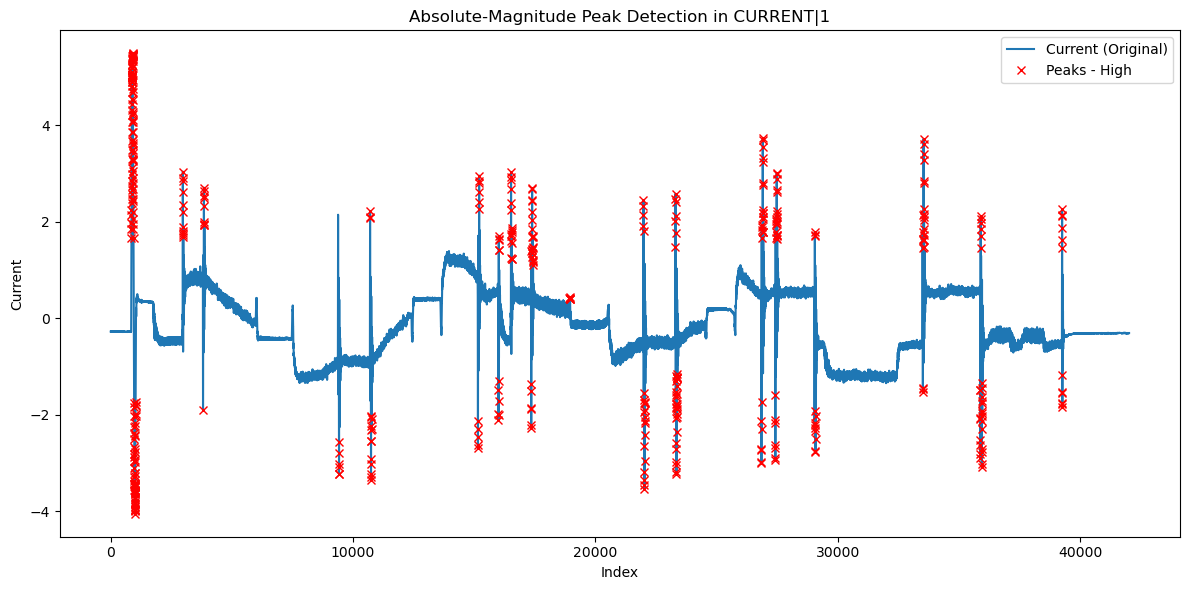

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


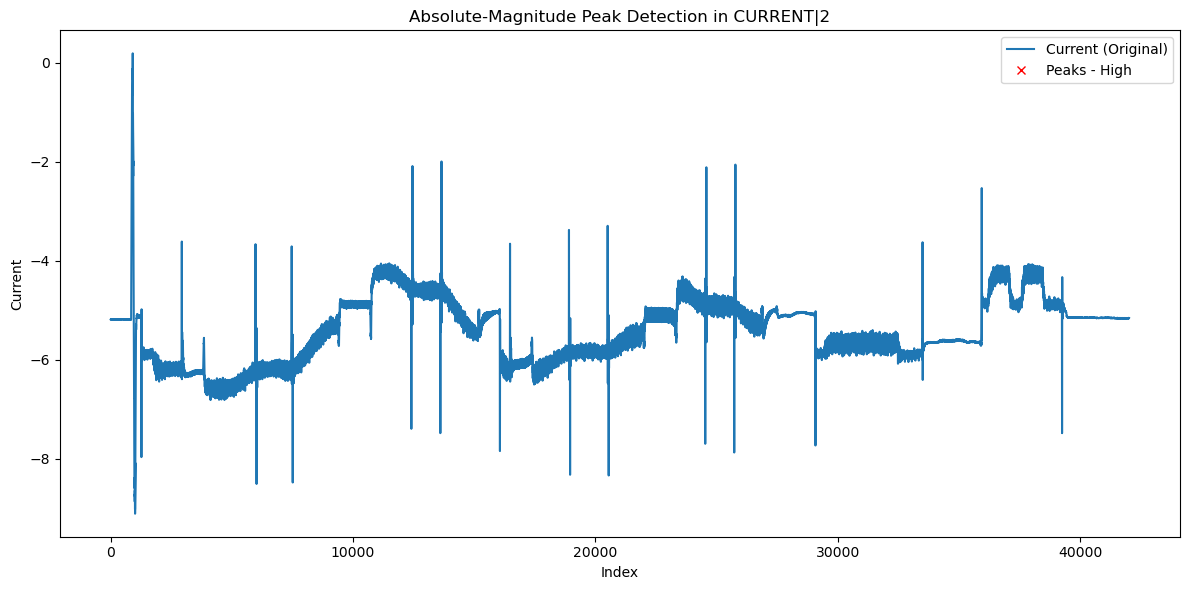

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


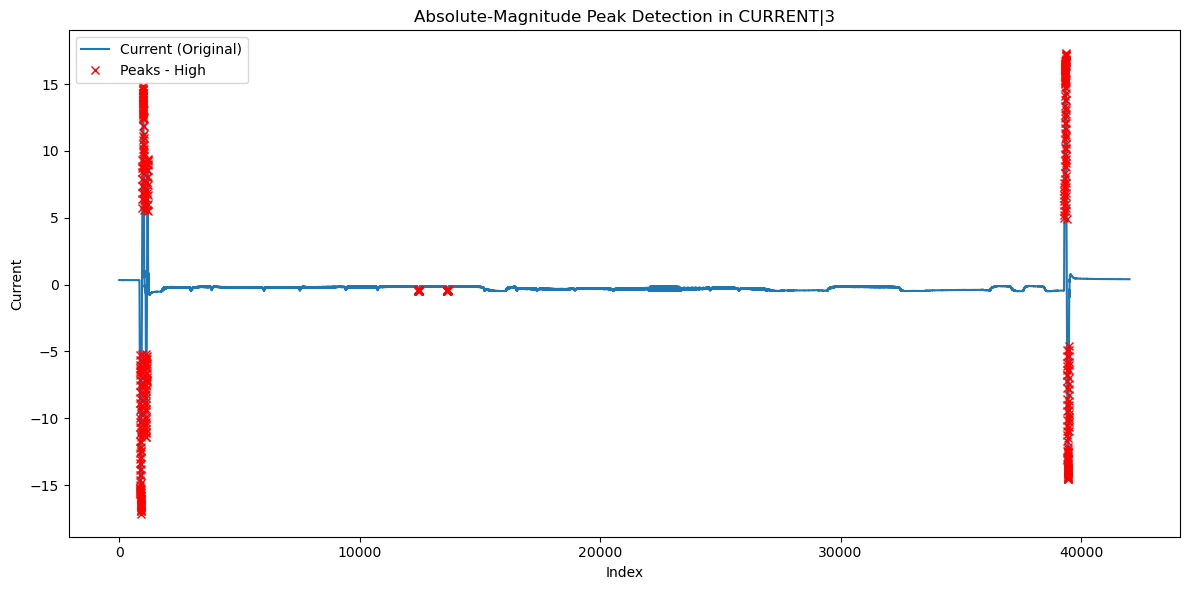

C:\Users\nathi\AppData\Local\Temp\ipykernel_20188\3776702692.py:27: PeakPropertyWarning: some peaks have a prominence of 0
  peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])


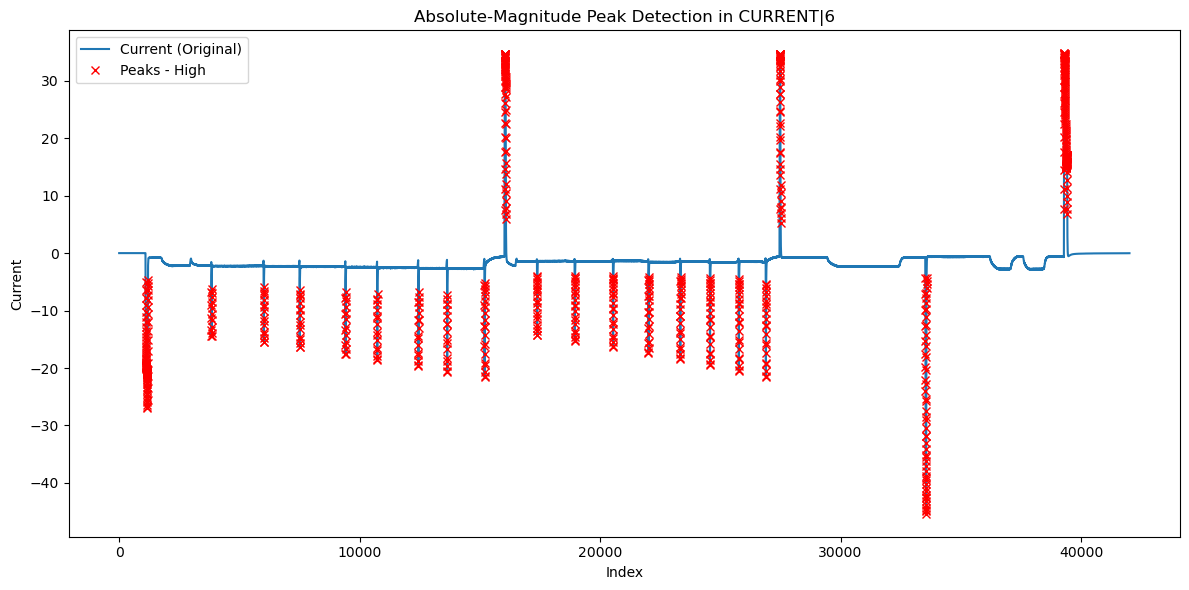

,Dataset,Column,Window,Accuracy,Precision,Recall,F1,Detected_Peaks,Prominence
23,threshold_DMC2_AL_CP2,CURRENT|6,1500,0.998632,0.983122,0.928287,0.954918,948,0.000000
30,threshold_DMC2_S_CP2,CURRENT|3,1500,0.997953,0.887097,0.912322,0.899533,434,0.000000
15,threshold_CMX1_S_CP2,CURRENT|6,1500,0.995007,0.864461,0.890110,0.877098,937,0.000000
28,threshold_DMC2_S_CP2,CURRENT|1,1500,0.997168,0.834821,0.892601,0.862745,448,0.000000
18,threshold_DMC2_AL_CP1,CURRENT|3,1500,0.999200,0.714486,1.000000,0.833469,1429,0.000000
31,threshold_DMC2_S_CP2,CURRENT|6,1500,0.993169,0.595205,1.000000,0.746242,709,0.000000
7,threshold_CMX1_AL_CP2,CURRENT|6,1500,0.988613,0.727915,0.688043,0.707418,1415,0.000000
16,threshold_DMC2_AL_CP1,CURRENT|1,1500,0.997351,0.430198,1.000000,0.601592,2371,0.000000
25,threshold_DMC2_S_CP1,CURRENT|2,1500,0.998613,0.722527,0.498106,0.589686,364,0.000000
19,threshold_DMC2_AL_CP1,CURRENT|6,1500,0.997310,0.417371,0.871569,0.564444,2130,0.000000


In [110]:
results = []

for name in names:

    df_filtered = pd.read_csv(f"{path}\\{name}") 
    plot_limit = df_filtered.shape[0]

    for window_size in window_sizes[-2:-1]:
            
        for column in columns_to_predict:
            # Compute moving average of the absolute current
            abs_col = f'{column}_abs'
            df_filtered[abs_col] = df_filtered[column].abs()
            df_filtered['MA_abs'] = df_filtered[abs_col].rolling(window=window_size, center=True).mean()

            # Peak where abs(current) > MA * threshold
            df_filtered['Peak_high'] = df_filtered[abs_col] > df_filtered['MA_abs'] * threshold_high
            df_filtered['Peak_med'] = df_filtered[abs_col] > df_filtered['MA_abs'] * threshold_med
            df_filtered['Peak_low'] = df_filtered[abs_col] > df_filtered['MA_abs'] * threshold_low

            # Evaluation
            accuracy = accuracy_score(df_filtered[f'{column}_Peak'], df_filtered['Peak_high'])
            precision = precision_score(df_filtered[f'{column}_Peak'], df_filtered['Peak_high'], zero_division=0)
            recall = recall_score(df_filtered[f'{column}_Peak'], df_filtered['Peak_high'], zero_division=0)
            f1 = f1_score(df_filtered[f'{column}_Peak'], df_filtered['Peak_high'], zero_division=0)
            n_peaks = df_filtered['Peak_high'].sum()
            peak_prominence = np.average(peak_prominences(df_filtered[column], df_filtered['Peak_high'], window_size)[0])

            results.append({
                'Dataset': name.replace(".csv", ""), 
                'Column': column,
                'Window': window_size,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1': f1,
                'Detected_Peaks': n_peaks, 
                'Prominence': peak_prominence
                })
            
            #Limit to subset for plotting
            subset = df_filtered.iloc[:plot_limit]

            #Plot
            plt.figure(figsize=(12, 6))
            plt.plot(subset[column], label='Current (Original)')

            # plt.plot(subset['MA_abs'], '--', label='MA of |Current|')

            # # Shade peak areas (continuous zones where Peak_high is True)
            # in_peak = False
            # start_idx = None
            # for i in range(len(subset)):
            #     if subset['Peak_high'].iloc[i] and not in_peak:
            #         in_peak = True
            #         start_idx = subset.index[i]
            #     elif not subset['Peak_high'].iloc[i] and in_peak:
            #         end_idx = subset.index[i]
            #         plt.axvspan(start_idx, end_idx, color='red', alpha=0.7)
            #         in_peak = False
            # # Handle case where last value is still a peak
            # if in_peak:
            #     plt.axvspan(start_idx, subset.index[-1], color='red', alpha=0.7)

            plt.plot(subset.index[subset['Peak_high']], subset[column][subset['Peak_high']], 'rx', label='Peaks - High')

            plt.title(f"Absolute-Magnitude Peak Detection in {column}")
            plt.xlabel("Index")
            plt.ylabel("Current")
            plt.legend()
            plt.tight_layout()
            plt.savefig(f'Plots\\MA_{column.replace("|", "")}.png')
            plt.show()

    # Save to DataFrame
    results_df = pd.DataFrame(results)
    results_df.sort_values(by='F1', ascending=False, inplace=True)
    display(results_df)
    # F1 needs to be considered since it is an imbalances dataset. It provides a balanced measure of a model's accuracy by considering both precision and recall.

    # results_df.to_csv(f"Results/MA_results_{name.replace(".csv", "")}.csv")


In [108]:


# for column in columns_to_predict:
#     df_filtered['MA_pos'] = df_filtered[column].where(df_filtered[column] > 0).rolling(window=window_size, center=True).mean()
#     df_filtered['MA_neg'] = df_filtered[column].where(df_filtered[column] < 0).abs().rolling(window=window_size, center=True).mean() * -1

#     df_filtered['Pos_Peak_high'] = df_filtered[column] > df_filtered['MA_pos'] * threshold_high
#     df_filtered['Neg_Peak_high'] = df_filtered[column] < df_filtered['MA_neg'] * threshold_high
#     df_filtered['Pos_Peak_med'] = df_filtered[column] > df_filtered['MA_pos'] * threshold_med
#     df_filtered['Neg_Peak_med'] = df_filtered[column] < df_filtered['MA_neg'] * threshold_med
#     df_filtered['Pos_Peak_low'] = df_filtered[column] > df_filtered['MA_pos'] * threshold_low
#     df_filtered['Neg_Peak_low'] = df_filtered[column] < df_filtered['MA_neg'] * threshold_low

#     subset = df_filtered.iloc[:plot_limit]

#     # Plot
#     plt.figure(figsize=(12, 6))
#     plt.plot(subset[column], label='Current')
#     plt.plot(subset['MA_pos'], '--', label='Positive MA')
#     plt.plot(subset['MA_neg'], '--', label='Negative MA')
#     plt.plot(subset.index[subset['Pos_Peak_med']], subset[column][subset['Pos_Peak_med']], 'ro', label='Positive Peaks')
#     plt.plot(subset.index[subset['Neg_Peak_med']], subset[column][subset['Neg_Peak_med']], 'ro', label='Negative Peaks')
#     plt.title(f"Peak Detection in {column} (First {plot_limit} points)")
#     plt.xlabel("Index")
#     plt.ylabel("Current")
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

In [109]:
# # Choose column to detect peaks on
# columns_to_predict = ['CURRENT|1', 'CURRENT|2', 'CURRENT|3', 'CURRENT|6']

# # Moving average window size
# window_size = 500
# threshold_high, threshold_med, threshold_low = 1.8, 1.5, 1.2
# df_filtered = df[df['Material'] == 'AL'].copy()
# plot_limit = 100000

# for column in columns_to_predict:
#     df_filtered['MA_pos'] = df_filtered[column].where(df_filtered[column] > 0).rolling(window=window_size, center=True).mean()
#     df_filtered['MA_neg'] = df_filtered[column].where(df_filtered[column] < 0).abs().rolling(window=window_size, center=True).mean() * -1

#     df_filtered['Peak_high'] = (df_filtered[column] > df_filtered['MA_pos'] * threshold_high) | (df_filtered[column] < df_filtered['MA_neg'] * threshold_high)
#     df_filtered['Peak_med'] = (df_filtered[column] > df_filtered['MA_pos'] * threshold_med) | (df_filtered[column] < df_filtered['MA_neg'] * threshold_med)
#     df_filtered['Peak_low'] = (df_filtered[column] > df_filtered['MA_pos'] * threshold_low) | (df_filtered[column] < df_filtered['MA_neg'] * threshold_low)

#     subset = df_filtered.iloc[:plot_limit]

#     # Plot
#     plt.figure(figsize=(12, 6))
#     plt.plot(subset[column], label='Current')
#     plt.plot(subset['MA_pos'], '--', label='Positive MA')
#     plt.plot(subset['MA_neg'], '--', label='Negative MA')
#     plt.plot(subset.index[subset['Peak_low']], subset[column][subset['Peak_low']], 'bo', label='Peak - Low')
#     plt.plot(subset.index[subset['Peak_med']], subset[column][subset['Peak_med']], 'co', label='Peak - Med')
#     plt.plot(subset.index[subset['Peak_high']], subset[column][subset['Peak_high']], 'ro', label='Peak - High')
    
#     # plt.plot(subset.index[subset['Neg_Peak_high']], subset[column][subset['Neg_Peak']], 'ro', label='Negative Peaks')
#     plt.title(f"Peak Detection in {column} (First {plot_limit} points)")
#     plt.xlabel("Index")
#     plt.ylabel("Current")
#     plt.legend()
#     plt.tight_layout()
#     plt.show()